In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, classification_report
from sklearn.manifold import TSNE
import pandas as pd

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

In [9]:
def compute_bow(documents, max_features):
    """
    Computes the bag-of-words matrix for the given documents.

    Parameters:
    - documents: List of text documents.
    - max_features: Maximum number of features (vocabulary size).

    Returns:
    - bow_matrix: Sparse matrix of shape (n_samples, n_features).
    """

    vectorizer = CountVectorizer(max_features=max_features)
    bow_matrix = vectorizer.fit_transform(documents)
    return bow_matrix

In [10]:
def compute_tfidf(documents, max_features):
    """
    Computes the tfidf matrix for the given documents.

    Parameters:
    - documents: List of text documents.
    - max_features: Maximum number of features to use.

    Returns:
    - tfidf_matrix: Sparse matrix of shape (n_samples, n_features).
    """
   
    vectorizer = TfidfVectorizer(max_features=max_features)
    tfidf_matrix = vectorizer.fit_transform(documents)
    feature_names = vectorizer.get_feature_names_out()  # Extract feature names
    return tfidf_matrix, feature_names

In [11]:
def apply_lsa(tfidf_matrix, n_components):
    """
    Applies LSA (using TruncatedSVD) to the tfidf matrix.

    Parameters:
    - tfidf_matrix: Sparse matrix from tfidf vectorization.
    - n_components: Number of components to keep.

    Returns:
    - lsa_matrix: Dense matrix with reduced dimensions.
    """
 
    vectorizer = TruncatedSVD(n_components=n_components)
    lsa_matrix = vectorizer.fit_transform(tfidf_matrix)
    return lsa_matrix

In [12]:
def create_documents(df):
  documents = df['review'].tolist()
  return documents

In [13]:
def create_labels(df):
  labels = df['voted_up'].tolist()
  return labels

In [ ]:
def compute_vader_sentiment_scores(documents):
    analyzer = SentimentIntensityAnalyzer()
    scores = []

    for doc in documents:
        sentiment = analyzer.polarity_scores(doc)
        scores.append(sentiment)  # This is a dict with 'neg', 'neu', 'pos', 'compound'

    return pd.DataFrame(scores)


In [14]:
max_features = 1000

In [ ]:
df = pd.read_csv('cleaned_data.csv')
documents = create_documents(df)

vader_scores_df = compute_vader_sentiment_scores(documents) #create the scores (and for now do literally nothing with them)
#df = pd.concat([df, vader_scores_df], axis=1)

labels = create_labels(df)
bow_matrix = compute_bow(documents, 1000)
print("Bag of words matrix:")
print(bow_matrix)

tfidf_matrix, feature_names = compute_tfidf(documents, 1000)
print("TF-IDF matrix:")
print(tfidf_matrix)

lsa_matrix = apply_lsa(tfidf_matrix, 100)
print("LSA matrix:")
print(lsa_matrix)

Bag of words matrix:
  (0, 245)	1
  (0, 992)	1
  (0, 499)	1
  (0, 828)	1
  (0, 576)	1
  (0, 62)	2
  (0, 475)	1
  (0, 197)	1
  (0, 602)	1
  (0, 375)	1
  (0, 156)	1
  (0, 878)	1
  (0, 354)	1
  (0, 452)	1
  (0, 581)	1
  (0, 22)	1
  (0, 334)	1
  (0, 257)	1
  (0, 886)	1
  (0, 93)	1
  (1, 477)	1
  (1, 149)	1
  (1, 983)	1
  (1, 740)	1
  (1, 971)	1
  :	:
  (315, 905)	1
  (315, 614)	1
  (315, 796)	1
  (315, 675)	1
  (315, 185)	1
  (315, 766)	1
  (315, 887)	1
  (315, 323)	1
  (315, 800)	1
  (315, 883)	2
  (315, 853)	1
  (315, 41)	2
  (315, 457)	1
  (315, 343)	1
  (315, 526)	1
  (315, 370)	3
  (316, 992)	2
  (316, 375)	1
  (316, 833)	1
  (316, 351)	2
  (316, 969)	1
  (316, 507)	2
  (316, 400)	2
  (316, 347)	1
  (316, 376)	3
TF-IDF matrix:
  (0, 245)	0.1798944688358737
  (0, 992)	0.12799413343858076
  (0, 499)	0.17630468752888653
  (0, 828)	0.26861867822247365
  (0, 576)	0.17515148536642391
  (0, 62)	0.23301594564803238
  (0, 475)	0.2638756947530238
  (0, 197)	0.22676673793847876
  (0, 602)	0.1836

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB



from xgboost import XGBClassifier



In [ ]:
def evaluate_naive_bayes(X, y, test_size=0.2):
    """
    Splits the dataset, trains a Naive Bayes classifier (MultinomialNB),
    and evaluates performance.

    Parameters:
    - X: Feature matrix (may not allow LSA features because negative values).
    - y: Ground truth labels.
    - test_size: Fraction of data to use for testing.

    Returns:
    - accuracy: Accuracy score on the test set.
    - nb_model: The trained Naive Bayes model.
    """
    # 1. Split Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # 2. Instantiate Model
    nb_model = MultinomialNB()
    # nb_model = GaussianNB()        # uncomment for lsa tfidf

    # 3. Train
    nb_model.fit(X_train, y_train)

    # 4. Predict
    y_pred = nb_model.predict(X_test)

    # 5. Evaluate

    accuracy = accuracy_score(y_test, y_pred)
    print("Naive Bayes Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, normalize='true')
    sns.heatmap(cm, annot=True)
    plt.title('Confusion matrix of the classifier')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    return accuracy, nb_model

In [ ]:
# Run everything

y = create_labels(df)

bow_matrix = compute_bow(documents, max_features)
X_tfidf, feature_names = compute_tfidf(documents, max_features)
X_lsa = apply_lsa(X_tfidf, 100)


acc_nb, model_nb = evaluate_naive_bayes(X_tfidf, y)

# NB for BoW
acc_nb_bow, model_nb_bow = evaluate_naive_bayes(bow_matrix, y)

Naive Bayes Accuracy: 0.90625
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.91      1.00      0.95        58

    accuracy                           0.91        64
   macro avg       0.45      0.50      0.48        64
weighted avg       0.82      0.91      0.86        64

Naive Bayes Accuracy: 0.84375
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.56      0.50         9
           1       0.92      0.89      0.91        55

    accuracy                           0.84        64
   macro avg       0.69      0.72      0.70        64
weighted avg       0.86      0.84      0.85        64



/Users/jhsualv/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jhsualv/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jhsualv/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

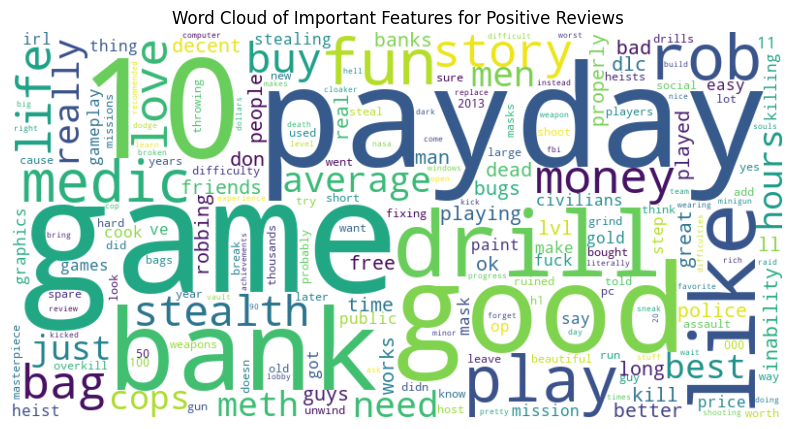

In [19]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Get the log probabilities of features for each class
# Assuming model_nb is a trained MultinomialNB or similar Naive Bayes model
class_log_probs = model_nb.feature_log_prob_

# Focus on one class (e.g., class 1)
class_index = 1  # Change to 0 or 1 depending on the class you want to visualize
feature_importances = np.exp(class_log_probs[class_index])  # Convert log probabilities to probabilities

# Create a dictionary mapping words to their importance
word_importance = {feature_names[i]: feature_importances[i] for i in range(len(feature_names))}

# Filter out stop words
filtered_word_importance = {
    word: importance
    for word, importance in word_importance.items()
    if word not in ENGLISH_STOP_WORDS
}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_word_importance)


# title based on class index

title = "Word Cloud of Important Features for Positive Reviews" if class_index == 1 else "Word Cloud of Important Features for Negative Reviews"


# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(title)
plt.show()

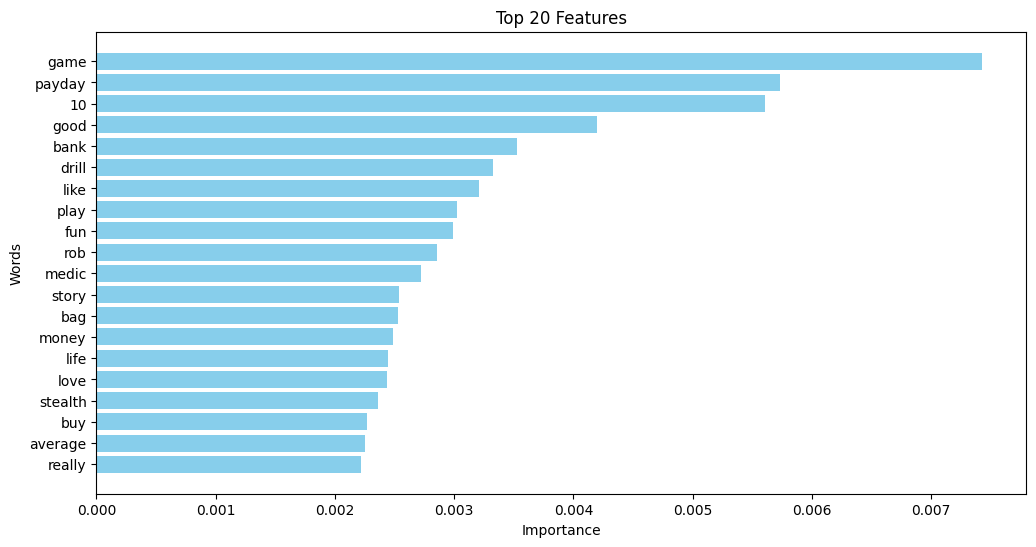

In [20]:


# Convert the adjective importance dictionary to a DataFrame
adjective_df = pd.DataFrame(list(filtered_word_importance.items()), columns=['Word', 'Importance'])

# Sort by importance and select the top N features
top_n = 20
top_adjectives = adjective_df.sort_values(by='Importance', ascending=False).head(top_n)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_adjectives['Word'], top_adjectives['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
plt.xlabel('Importance')
plt.ylabel('Words')
plt.title(f'Top {top_n} Features')
plt.show()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/jhsualv/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/jhsualv/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/jhsualv/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/jhsualv/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/jhsualv/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package avera

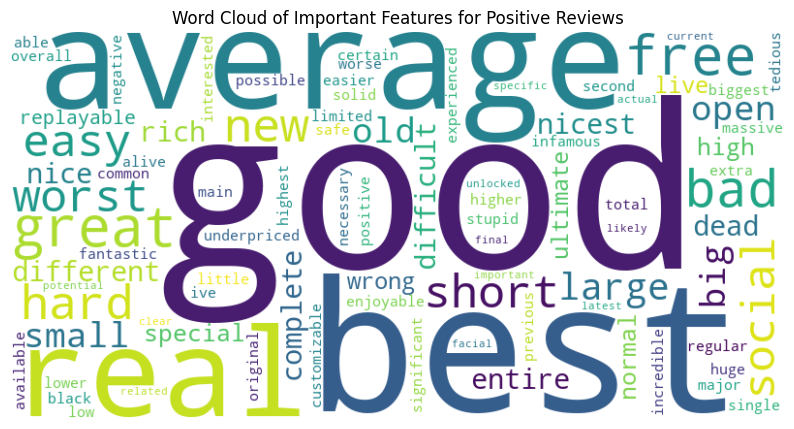

In [ ]:

from nltk import pos_tag
from nltk.corpus import wordnet

# Download NLTK resources if not already downloaded
nltk.download('all')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Get the log probabilities of features for each class
# Assuming model_nb is a trained MultinomialNB or similar Naive Bayes model
class_log_probs = model_nb.feature_log_prob_

# Focus on one class (e.g., class 1)

feature_importances = np.exp(class_log_probs[class_index])  # Convert log probabilities to probabilities

# Create a dictionary mapping words to their importance
word_importance = {feature_names[i]: feature_importances[i] for i in range(len(feature_names))}

# Filter out stop words
filtered_word_importance = {
    word: importance
    for word, importance in word_importance.items()
    if word not in ENGLISH_STOP_WORDS
}

# Filter to include only adjectives
def is_adjective(word):
    pos = pos_tag([word])[0][1]  # Get the part of speech tag
    return pos.startswith('JJ')  # Adjectives in NLTK are tagged as 'JJ', 'JJR', or 'JJS'

adjective_word_importance = {
    word: importance
    for word, importance in filtered_word_importance.items()
    if is_adjective(word)
}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(adjective_word_importance)


# title based on class index
title = "Word Cloud of Important Features for Positive Reviews" if class_index == 1 else "Word Cloud of Important Features for Negative Reviews"


# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(title)
plt.show()

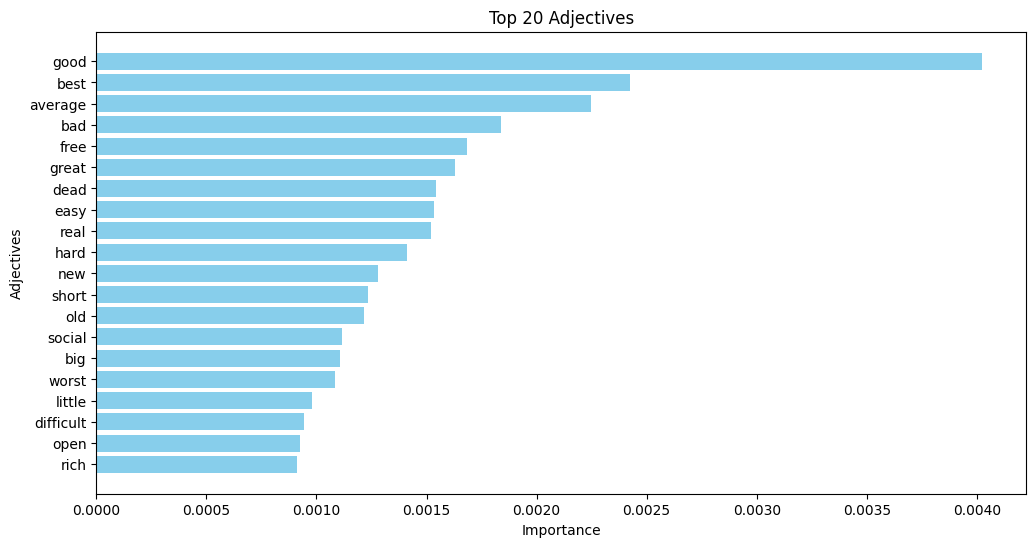

In [ ]:


# Convert the adjective importance dictionary to a DataFrame
adjective_df = pd.DataFrame(list(adjective_word_importance.items()), columns=['Word', 'Importance'])

# Sort by importance and select the top N features
top_n = 20
top_adjectives = adjective_df.sort_values(by='Importance', ascending=False).head(top_n)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_adjectives['Word'], top_adjectives['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
plt.xlabel('Importance')
plt.ylabel('Adjectives')
plt.title(f'Top {top_n} Adjectives')
plt.show()

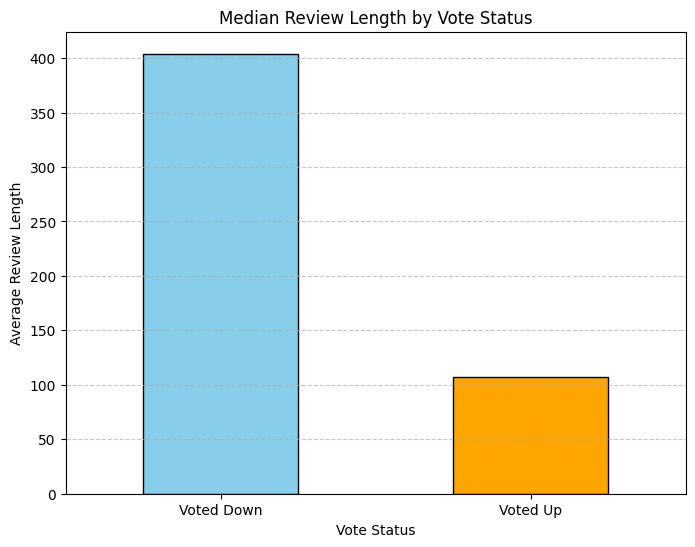

In [ ]:
# Load the CSV file
file_path = "cleaned_data.csv"  # Update this with the correct path if needed
df = pd.read_csv(file_path)

# Calculate the length of each review
df['review_length'] = df['review'].astype(str).apply(len)

# Group by 'voted_up' and calculate the average review length
avg_review_length = df.groupby('voted_up')['review_length'].median()

# Plot the bar chart
plt.figure(figsize=(8, 6))
avg_review_length.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')

# Update the x-axis labels
plt.title('Median Review Length by Vote Status')
plt.xlabel('Vote Status')
plt.ylabel('Average Review Length')
plt.xticks(ticks=[0, 1], labels=['Voted Down', 'Voted Up'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

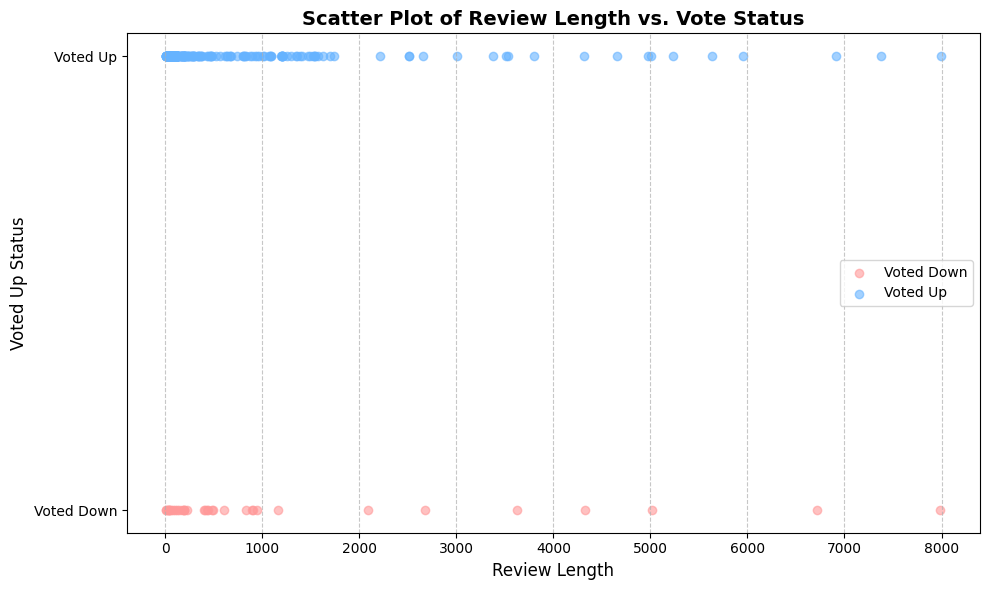

In [ ]:


# Calculate the length of each review
df['review_length'] = df['review'].astype(str).apply(len)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df[df['voted_up'] == 0]['review_length'],  # Review lengths for 'Not Voted Up'
    [0] * len(df[df['voted_up'] == 0]),       # Corresponding y-values (voted_up = 0)
    color='#FF9999', alpha=0.6, label='Voted Down'
)
plt.scatter(
    df[df['voted_up'] == 1]['review_length'],  # Review lengths for 'Voted Up'
    [1] * len(df[df['voted_up'] == 1]),       # Corresponding y-values (voted_up = 1)
    color='#66B3FF', alpha=0.6, label='Voted Up'
)

# Add titles and labels
plt.title('Scatter Plot of Review Length vs. Vote Status', fontsize=14, fontweight='bold')
plt.xlabel('Review Length', fontsize=12)
plt.ylabel('Voted Up Status', fontsize=12)
plt.yticks([0, 1], ['Voted Down', 'Voted Up'])  # Custom y-axis labels
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# t-SNE Visualizations (2D, 3D)

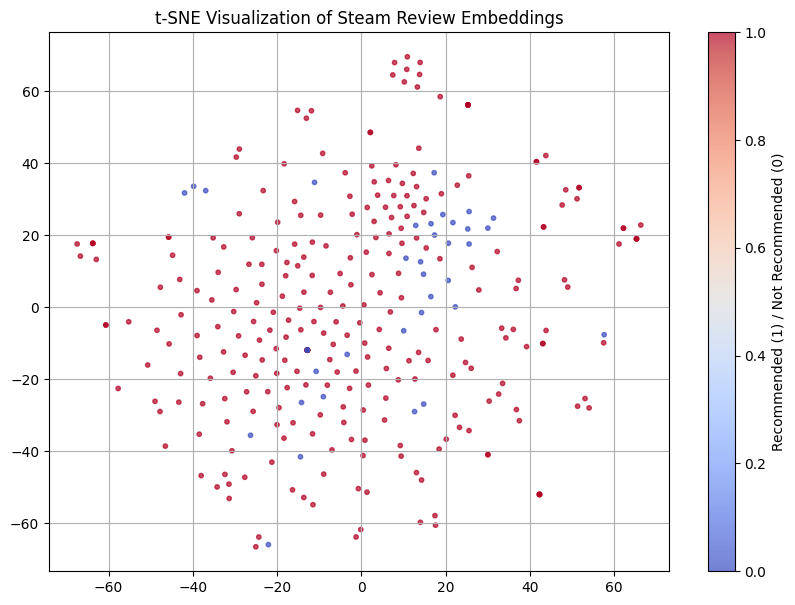

In [22]:
# Reduce to 2D with t-SNE
tsne = TSNE(n_components=2, random_state=130, perplexity=30)
X_tsne = tsne.fit_transform(lsa_matrix)

# Plot the results
plt.figure(figsize=(10,7))

# Create the scatter plot
scatter2D = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='coolwarm', alpha=0.7, s=10)

plt.colorbar(scatter2D, label='Recommended (1) / Not Recommended (0)')
plt.title('t-SNE Visualization of Steam Review Embeddings')
plt.grid(True)
plt.show()

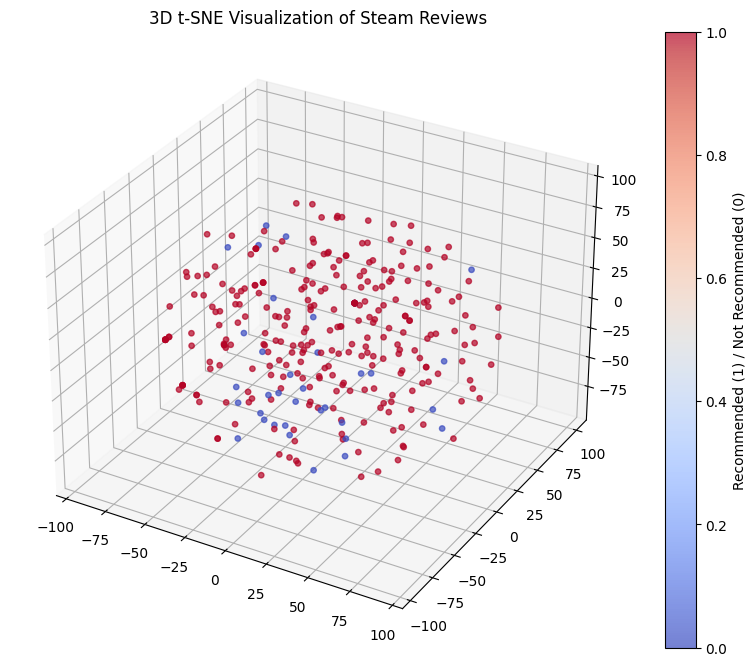

In [23]:

# t-SNE with 3 components, fit using LSA-reduced matrix
tsne_3d = TSNE(n_components=3, random_state=130, perplexity=30)
X_tsne_3d = tsne_3d.fit_transform(lsa_matrix)

# Plot the results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
scatter3D = ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], c=labels, cmap='coolwarm', alpha=0.7, s=15)

ax.set_title("3D t-SNE Visualization of Steam Reviews")
fig.colorbar(scatter3D, label='Recommended (1) / Not Recommended (0)')

plt.show()


# Top-N Feature Plot

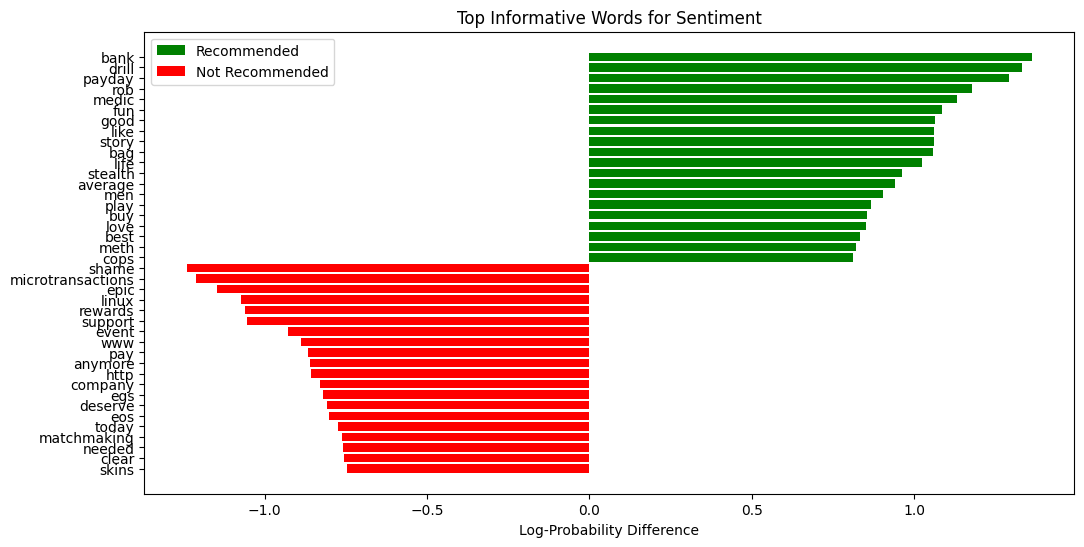

In [24]:
# Get the log probabilities of features
class_log_probs = model_nb.feature_log_prob_

# Get the difference between class 1 and class 0 (Recommended vs Not Recommended)
log_prob_diff = class_log_probs[1] - class_log_probs[0]  # Higher = more likely to be in recommended reviews

# Map words to importance difference and filter out common/junk words
word_importance = {feature_names[i]: log_prob_diff[i] for i in range(len(feature_names))}

custom_stopwords = ENGLISH_STOP_WORDS.union({'game', 'games', 'player', 'players'})
filtered_word_importance = {word: importance for word, importance in word_importance.items() if word.lower() not in custom_stopwords and word.isalpha() and len(word) > 2}

# Create DataFrame of word importances
importance_df = pd.DataFrame(list(filtered_word_importance.items()), columns=['Word', 'Importance'])

# Get the Top N positive (recommended) and Top N negative (not recommended) words
top_n = 20
top_positive = importance_df.sort_values(by='Importance', ascending=False).head(top_n)
top_negative = importance_df.sort_values(by='Importance', ascending=True).head(top_n)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(top_positive['Word'], top_positive['Importance'], color='green', label='Recommended')
plt.barh(top_negative['Word'], top_negative['Importance'], color='red', label='Not Recommended')
plt.xlabel('Log-Probability Difference')
plt.title('Top Informative Words for Sentiment')
plt.legend()
plt.gca().invert_yaxis()
plt.show()

# BoW Top-N Feature Plot

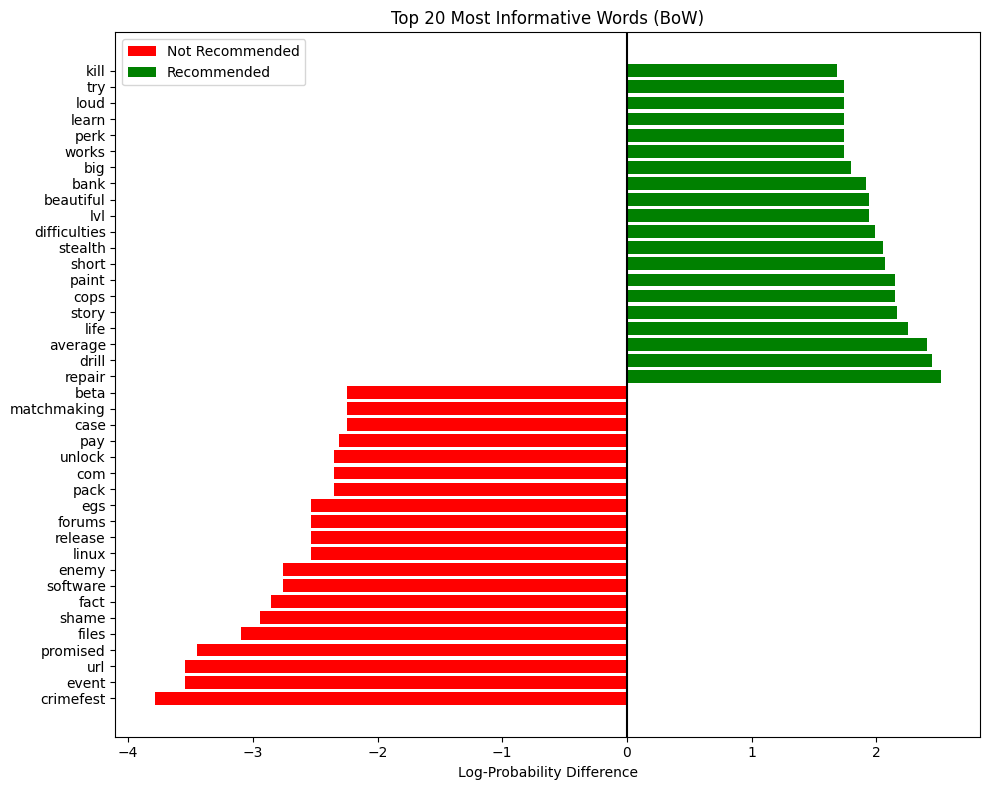

In [26]:
# Get feature names from BoW vectorizer
bow_vectorizer = CountVectorizer(max_features=max_features)
bow_vectorizer.fit(documents)
bow_feature_names = bow_vectorizer.get_feature_names_out()

# Get feature importance (difference between class log probs)
class_log_probs_bow = model_nb_bow.feature_log_prob_
log_prob_diff_bow = class_log_probs_bow[1] - class_log_probs_bow[0]

# Build dataframe
word_importance_bow = {bow_feature_names[i]: log_prob_diff_bow[i] for i in range(len(bow_feature_names))}

# Filter out common stopwords
filtered_word_importance_bow = {word: importance for word, importance in word_importance_bow.items() if word.lower() not in custom_stopwords and word.isalpha() and len(word) > 2}

importance_df_bow = pd.DataFrame(
    list(filtered_word_importance_bow.items()), columns=['Word', 'Importance']
)

# Plot Top-N Features
top_n = 20
top_positive_bow = importance_df_bow.sort_values(by='Importance', ascending=False).head(top_n)
top_negative_bow = importance_df_bow.sort_values(by='Importance', ascending=True).head(top_n)

plt.figure(figsize=(10, 8))
plt.barh(top_negative_bow['Word'], top_negative_bow['Importance'], color='red', label='Not Recommended')
plt.barh(top_positive_bow['Word'], top_positive_bow['Importance'], color='green', label='Recommended')
plt.axvline(0, color='black')
plt.xlabel('Log-Probability Difference')
plt.title(f'Top {top_n} Most Informative Words (BoW)')
plt.legend()
plt.tight_layout()
plt.show()

# BoW WordCloud

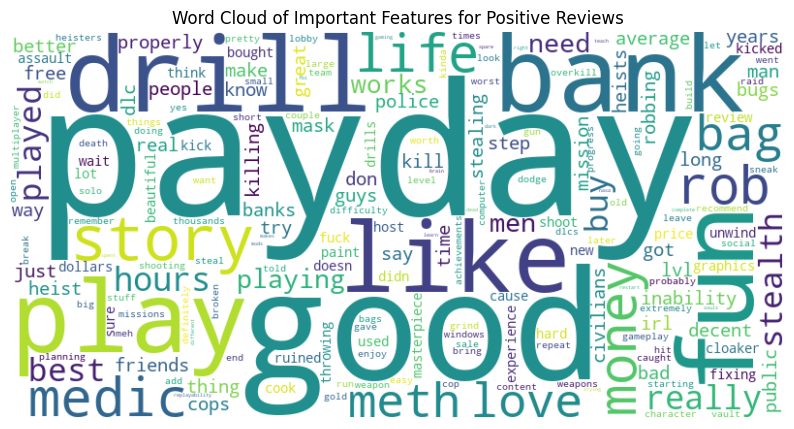

In [ ]:
# Get log probs of the features for each class
class_log_probs_bow = model_nb_bow.feature_log_prob_

# Focus on a single class
class_index = 1  # 1 = recommended, 0 = not recommended
feature_importances = np.exp(class_log_probs[class_index])  # convert log-probs to probs

# Create word importance dictionary
word_importance = {bow_feature_names[i]: feature_importances[i] for i in range(len(bow_feature_names))}

# Filter out common stopwords + junk
filtered_word_importance = {word: importance for word, importance in word_importance.items() if word.lower() not in custom_stopwords and word.isalpha() and len(word) > 2}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_word_importance)

# Plot
title = "Word Cloud of Important Features for Positive Reviews (BoW)" if class_index == 1 else "Word Cloud of Important Features for Negative Reviews"

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(title)
plt.show()
